# 5.8 Midterm Assignment: Practice

In [4]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score, euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.cluster.hierarchy as sch

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Problem 1: Dermatology
This database contains 34 attributes. 35th is the class label, i.e. the disease name. The names and id numbers of the patients were removed from the database.<p>

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.<p>

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.<p>

Assuming that the list of diseases in this group are complete (total 6 types)
'Psoriasis', 'Seboreic Dermatitis', 'Lichen Planus', 'Pityriasis Rosea', 'Cronic Dermatitis', 'Pityriasis Rubra Pilaris'
Use the dataset to address the following list of objectives:<p>

1. Let’s try determining the type of disease based on the patient’s Age. Use gradient descent (GD) to build your regression model (model1). Start by writing the GD algorithm and then implement it using a programming language of your choice. [10 points]<p>
2. Use random forest on the clinical as well as histopathological attributes to classify the disease type (model2). [5 points]<p>
3. Use kNN on the clinical attributes and histopathological attributes to classify the disease type and report your accuracy (model3). [5 points]<p>
4. Finally, use two different clustering algorithms and see how well these attributes can determine the disease type (model4 and model5). [10 points]<p>
5. Make sure to report your actual model for each of the above. This means providing appropriate details containing the features used, parameters learned/estimated, and any inputs (e.g., number of clusters, error limit) that go into the technique. When appropriate, perform multiple runs of the same technique and report average values or their spread.<p>
6. Now, compare and contrast the five models you built. Having done both classification and clustering on the same dataset, what can you say about this data and/or the techniques you used? Write your thoughts in 2-3 paragraphs. [10 points]<p>
7. Overall presentation (lack of spelling and other errors, consistent formatting, clear results). [5 points]<p>

In [5]:
df_derm = pd.read_csv('dermatology.csv', sep='\t')
df_derm['Age'] = pd.to_numeric(df_derm['Age'], errors='coerce')
df_derm = df_derm[df_derm['Age'] > 0]
print(df_derm.columns)
display(df_derm.head(3))
df_derm.info()

Index(['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner ',
       'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory',
       'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis',
       'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing',
       'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal',
       'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1',
       'Perifollicular', 'Inflamatory', 'Band-like', 'Age', 'Disease'],
      dtype='object')


,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3


<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 0 to 365
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Erythema          357 non-null    int64  
 1   Scathing          357 non-null    int64  
 2   Definite Borders  357 non-null    int64  
 3   Itching           357 non-null    int64  
 4   Koebner           357 non-null    int64  
 5   Polygonal         357 non-null    int64  
 6   Follicular        357 non-null    int64  
 7   Oral              357 non-null    int64  
 8   Knee              357 non-null    int64  
 9   Scalp             357 non-null    int64  
 10  Family Hostory    357 non-null    int64  
 11  Melanin           357 non-null    int64  
 12  Eosinophils       357 non-null    int64  
 13  PNL               357 non-null    int64  
 14  Fibrosis          357 non-null    int64  
 15  Exocytosis        357 non-null    int64  
 16  Acanothosis       357 non-null    int64  
 17  Hy

In [6]:
features_all = ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner ',
       'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory',
       'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis',
       'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing',
       'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal',
       'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1',
       'Perifollicular', 'Inflamatory', 'Band-like', 'Age']
disease_names = ['Psoriasis', 'Seboreic Dermatitis', 'Lichen Planus', 'Pityriasis Rosea', 
                'Cronic Dermatitis', 'Pityriasis Rubra Pilaris']

## Problem 1.1 (model1)
The Gradient Descent Algorithm:<p>

\begin{equation}
\frac {\partial J(\theta)} {\partial \theta_j} = \frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_j^i} 
\end{equation}
    
We begin by initializing our model's parameters, represented by the Theta vector (w in the previous notation), with random values. Using these parameters, we predict the output for our input data points using the hypothesis function (often denoted as ${h(\theta)}^{i}$).

Next, we quantify how far off our predictions are from the actual target values using a cost function, such as the Mean Squared Error (MSE). The goal of Gradient Descent is to minimize this cost function.

To find the set of parameters that minimizes the cost, we need to know in which direction to adjust our current parameters. This is where the gradient comes in. The gradient is a vector composed of the partial derivatives of the cost function with respect to each parameter ($\theta_0,\theta_1$, etc.). The gradient points in the direction of the steepest increase in the cost function.

To minimize the cost, we update our parameters by moving in the opposite direction of the gradient. The size of the step we take in that direction is controlled by the learning rate $α$. The update rule for each parameter is: $\theta_j:=\theta_j−\alpha(\partial\theta_j$)
    
Here is the general formula:
\begin{equation}
\theta_0 := \theta_0 - \alpha (\frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_0^i} )
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha (\frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_1^i}) 
\end{equation}

\begin{equation}
\theta_2 := \theta_2 - \alpha (\frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_2^i}) 
\end{equation}

\begin{equation}
\theta_j := \theta_j -\alpha (\frac {1} {n} {\sum_{i=1}^n ({h(\theta)}^{i}-y^i).X_j^i}) 
\end{equation}

In [4]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    '''
    X     = Matrix of X with added bias units
    y     = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = number of iterations
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))
    for it in range(iterations):
        prediction = X.dot(theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot(prediction - y))
        cost = (1/(2*m)) * np.sum((prediction - y)**2)
        theta_history[it, :] = theta.T
        cost_history[it] = cost
    return theta, cost_history, theta_history

def cost_fun(theta,X,y):
    '''Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1)) only for simple regression
    where: j is the no of features
    '''
    n = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*n)) * np.sum((predictions-y)**2)
    return cost

In [5]:
# Test with OLS first to validate Gradient Descent

# Train the linear regression model on the training data
model = smf.ols('Disease ~ Age', data=df_derm)
results = model.fit()

# Print the summary of the model trained on the training data
print("Summary of the model trained on the training data:")
print(results.summary())

Summary of the model trained on the training data:
                            OLS Regression Results                            
Dep. Variable:                Disease   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     26.49
Date:                Tue, 06 May 2025   Prob (F-statistic):           4.39e-07
Time:                        21:38:16   Log-Likelihood:                -659.52
No. Observations:                 357   AIC:                             1323.
Df Residuals:                     355   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

In [6]:
# Now run custom Gradient Descent Formula
# Prepare the data
X = df_derm['Age'].values.reshape(-1, 1)
y = df_derm['Disease'].values.reshape(-1, 1)
m = len(y)

# Standardize X and y
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()
X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

# Add bias column
X_b = np.c_[np.ones((m, 1)), X_scaled]

# Initialize theta
theta = np.zeros((2, 1))

# Set hyperparameters
learning_rate = 0.1
n_iterations = 100

# Train using gradient descent
theta_final, cost_history, theta_history = gradient_descent(X_b, y_scaled, theta, learning_rate, n_iterations)

# Recover coefficients in original scale
slope = (y_std / X_std) * theta_final[1, 0]
intercept = y_mean - slope * X_mean

# Print results
print("Gradient Descent Model Coefficients (original units):")
print(f"Intercept  : {intercept:.4f}")
print(f"Slope (Age): {slope:.4f}")
print(f"Final MSE  : {cost_history[-1]:0.3f}")

Gradient Descent Model Coefficients (original units):
Intercept  : 3.7909
Slope (Age): -0.0276
Final MSE  : 0.465


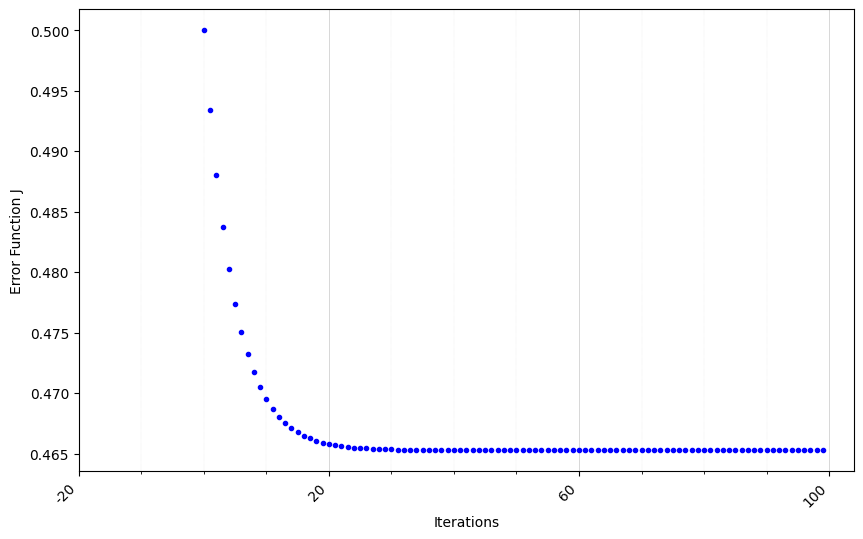

In [7]:
# Plot the Iterations vs Error/Cost
fig,ax = plt.subplots(figsize=(10,6))
major_locator = ticker.MultipleLocator(20)
ax.xaxis.set_major_locator(major_locator)
ax.set_ylabel('Error Function J')
ax.set_xlabel('Iterations')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.grid(axis='x', which='major', linestyle='-', linewidth=0.5, alpha=0.7)
ax.grid(axis='x', which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
_=ax.plot(range(n_iterations),cost_history,'b.')
plt.xticks(rotation=45, ha='right')
all_major_tick_locations = major_locator.tick_values(ax.get_xlim()[0], ax.get_xlim()[1])
label_locations = all_major_tick_locations[::2]
label_values = [str(int(loc)) for loc in label_locations]
plt.xticks(label_locations, label_values, rotation=45, ha='right')
plt.show()

## Model1
<b>Question:</b> Try determining the type of disease based on the patient’s Age. Use gradient descent (GD) to build your regression model (model1). Start by writing the GD algorithm and then implement it using a programming language of your choice.<p>
<b>Answer:</b> After around 17 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization.<p>
The Slope and Intercept match between the OLS and GD steps, so we will complete this answer:<p>
 - Intercept  : 3.7909<p>
 - Slope (Age): -0.0276<p>
 - Optimal iterations: 17

## Problem 1.2 Random Forest (model2)

In [8]:
model_type = 'RandomForest'
features = features_all
predictor = 'Disease'
test_size = .8
random_state = 42
print(f"{model_type} Prediction of {predictor} using {features} with {test_size=} {random_state=}")

X = df_derm[features]
y = df_derm[predictor]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print(f"Shape of X_train before training: {X_train.shape}")

scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures scaled using StandardScaler.")
print(f"Shape of X_train after scaling: {X_train_scaled.shape}")

# The model will be trained on the scaled data
clf = RandomForestClassifier(random_state=random_state)
clf.fit(X_train_scaled, y_train) # Fit on scaled training data

# Make predictions on the test set
# Predictions must be made on the scaled test data
y_pred = clf.predict(X_test_scaled) # Predict using scaled test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_type} Accuracy: {accuracy:.2f}")

print(f"\n{model_type} Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\n{model_type} Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

RandomForest Prediction of Disease using ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner ', 'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory', 'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis', 'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing', 'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1', 'Perifollicular', 'Inflamatory', 'Band-like', 'Age'] with test_size=0.8 random_state=42
Shape of X_train before training: (71, 34)

Features scaled using StandardScaler.
Shape of X_train after scaling: (71, 34)
RandomForest Accuracy: 0.98

RandomForest Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        83
           2       0.98      0.94      0.96        50
           3       1.00      1.00      1.00        59
           4       0.93      0.97      0.95        39
           5       1.00

<b>Question:</b> Use random forest on the clinical as well as histopathological attributes to classify the disease type.<p>

<b>Answer:</b>This Random Forest Model is extremely accurate at 98% (1% point higher after scaling the features; likely due to Age). It is perfect at predicting [1, 3, 5]  'Psoriasis', 'Lichen Planus', 'Cronic Dermatitis'.<p>
Seboreic Dermatitis (Actual Class 1): The model correctly predicted 47 cases of Seboreic Dermatitis. It incorrectly classified 3 cases of Seboreic Dermatitis as Pityriasis Rosea (Class 3).<p>
Pityriasis Rosea (Actual Class 3): The model correctly predicted 38 cases of Pityriasis Rosea. It misclassified 1 case of Pityriasis Rosea as Seboreic Dermatitis (Class 1).<p>
Pityriasis Rubra Pilaris (Actual Class 5): The model correctly predicted 13 cases of Pityriasis Rubra Pilaris. It incorrectly classified 1 case of Pityriasis Rubra Pilaris as Psoriasis (Class 0).<p>

## Problem 1.3 KNN (model3)

In [9]:
# Figure out the Optimal Number of clusters first; keep Scaled, same test/train split from above
model_type = 'KNN'
predictor = 'Disease'
print(f"{model_type} Prediction of {predictor} using {features} with {test_size=} {random_state=}")

accuracies = []
for k in range(2,10):
    # Initialize kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors
    # Train the model
    knn.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy of KNN {k=} Model predicting Disease: {accuracy:.2%}")

KNN Prediction of Disease using ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner ', 'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory', 'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis', 'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing', 'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1', 'Perifollicular', 'Inflamatory', 'Band-like', 'Age'] with test_size=0.8 random_state=42
Accuracy of KNN k=2 Model predicting Disease: 92.66%
Accuracy of KNN k=3 Model predicting Disease: 92.31%
Accuracy of KNN k=4 Model predicting Disease: 94.06%
Accuracy of KNN k=5 Model predicting Disease: 91.96%
Accuracy of KNN k=6 Model predicting Disease: 93.01%
Accuracy of KNN k=7 Model predicting Disease: 93.36%
Accuracy of KNN k=8 Model predicting Disease: 93.01%
Accuracy of KNN k=9 Model predicting Disease: 90.21%


Optimal number of n_neighbors=2 at 71% accuracy.

In [10]:
# keep Scaled, same test/train split from above
k = 2
knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors
# Train the model
knn.fit(X_train_scaled, y_train)
# Make predictions
y_pred = knn.predict(X_test_scaled)
print(f"\n{model_type} Classification Report:")
print(classification_report(y_test, y_pred))
print(f"\n{model_type} Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


KNN Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        83
           2       0.84      0.84      0.84        50
           3       1.00      1.00      1.00        59
           4       0.72      0.87      0.79        39
           5       1.00      0.80      0.89        41
           6       1.00      1.00      1.00        14

    accuracy                           0.93       286
   macro avg       0.93      0.92      0.92       286
weighted avg       0.93      0.93      0.93       286


KNN Confusion Matrix:
[[83  0  0  0  0  0]
 [ 0 42  0  8  0  0]
 [ 0  0 59  0  0  0]
 [ 0  5  0 34  0  0]
 [ 0  3  0  5 33  0]
 [ 0  0  0  0  0 14]]


<b>Question:</b> Use random forest on the clinical as well as histopathological attributes to classify the disease type.<p>

<b>Answer:</b> Psoriasis (Actual Class 0): The model correctly predicted 81 instances of Psoriasis. It misclassified 1 instance as Seboreic Dermatitis and 1 instance as Pityriasis Rosea.<p>
Seboreic Dermatitis (Actual Class 1): The model correctly identified 31 cases of Seboreic Dermatitis. However, it misclassified 2 instances as Psoriasis, 15 instances as Pityriasis Rosea, and 2 instances as Pityriasis Rubra Pilaris.<p>
Lichen Planus (Actual Class 2): The model correctly predicted 52 instances of Lichen Planus. It misclassified 3 instances as Seboreic Dermatitis and 4 instances as Pityriasis Rosea.<p>
Pityriasis Rosea (Actual Class 3): The model correctly predicted 20 instances of Pityriasis Rosea. It misclassified 1 instance as Psoriasis and 18 instances as Seboreic Dermatitis.<p>
Cronic Dermatitis (Actual Class 4): The model correctly predicted 7 instances of Cronic Dermatitis. It showed significant misclassifications for this class, predicting 5 instances as Psoriasis, 9 instances as Seboreic Dermatitis, 19 instances as Pityriasis Rosea, and 1 instance as Pityriasis Rubra Pilaris.<p>
Pityriasis Rubra Pilaris (Actual Class 5): The model correctly predicted 12 instances of Pityriasis Rubra Pilaris. It misclassified 2 instances as Seboreic Dermatitis.<p>

## Problem 1.4 Clustering (model4, model5)

Elbow Method: Calculate inertia for different numbers of clusters for Agglomerative Clustering


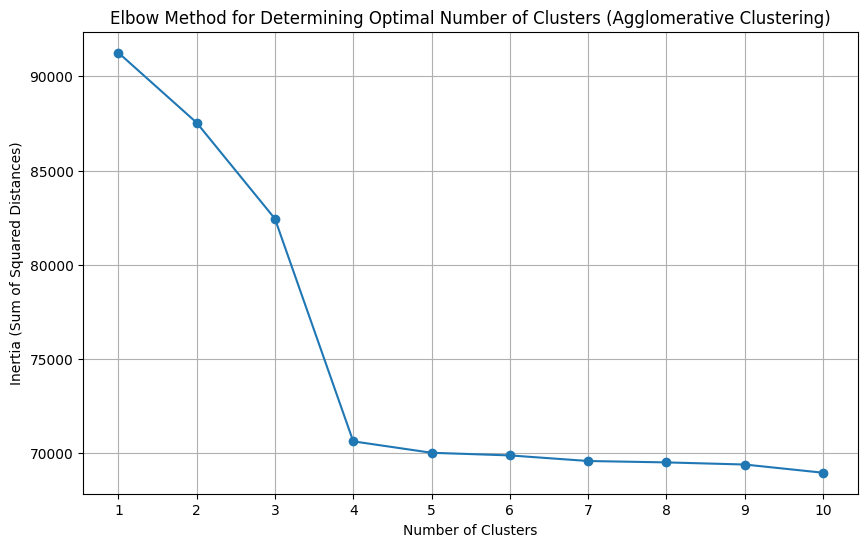


Interpretation of 'elbow point':
This is where the decrease in inertia slows down considerably.
The number of clusters at this elbow point is often considered a suitable value.
The elbow might not always be sharply defined, so this method provides a guideline.


In [13]:
# Use Agglomerative Clustering to find the best features
# Use the elbow method to find a good n_clusters
cluster_type = 'Agglomerative'
features = features_all
X =  df_derm[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Elbow Method: Calculate inertia for different numbers of clusters for {cluster_type} Clustering")

n_cluster_values = range(1, 11)
inertias = []
for n in n_cluster_values:
    # Initialize Agglomerative Clustering model
    agg_clustering = AgglomerativeClustering(n_clusters=n)
    # Fit the model to the data and get cluster labels
    labels = agg_clustering.fit_predict(X_scaled)
    # Calculate inertia (Sum of Squared Distances to cluster means)
    inertia_k = 0
    for i in range(n):
        # Get points belonging to the current cluster
        cluster_points = X[labels == i]
        if cluster_points.shape[0] > 0: # Ensure the cluster is not empty
            # Calculate the mean of the cluster and convert to NumPy array before reshaping
            centroid = np.mean(cluster_points, axis=0).values.reshape(1, -1)
            # Calculate squared Euclidean distances from points to the centroid
            # Reshape centroid to a 2D array for euclidean_distances
            distances_sq = euclidean_distances(cluster_points, centroid.reshape(1, -1))**2
            # Sum the squared distances for this cluster
            inertia_k += np.sum(distances_sq)
    inertias.append(inertia_k)

# --- Plotting the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(n_cluster_values, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Determining Optimal Number of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(n_cluster_values) # Show all n_clusters values on x-axis
plt.grid(True)
plt.show()

# --- Interpretation ---
print("\nInterpretation of 'elbow point':")
print("This is where the decrease in inertia slows down considerably.")
print("The number of clusters at this elbow point is often considered a suitable value.")
print("The elbow might not always be sharply defined, so this method provides a guideline.")

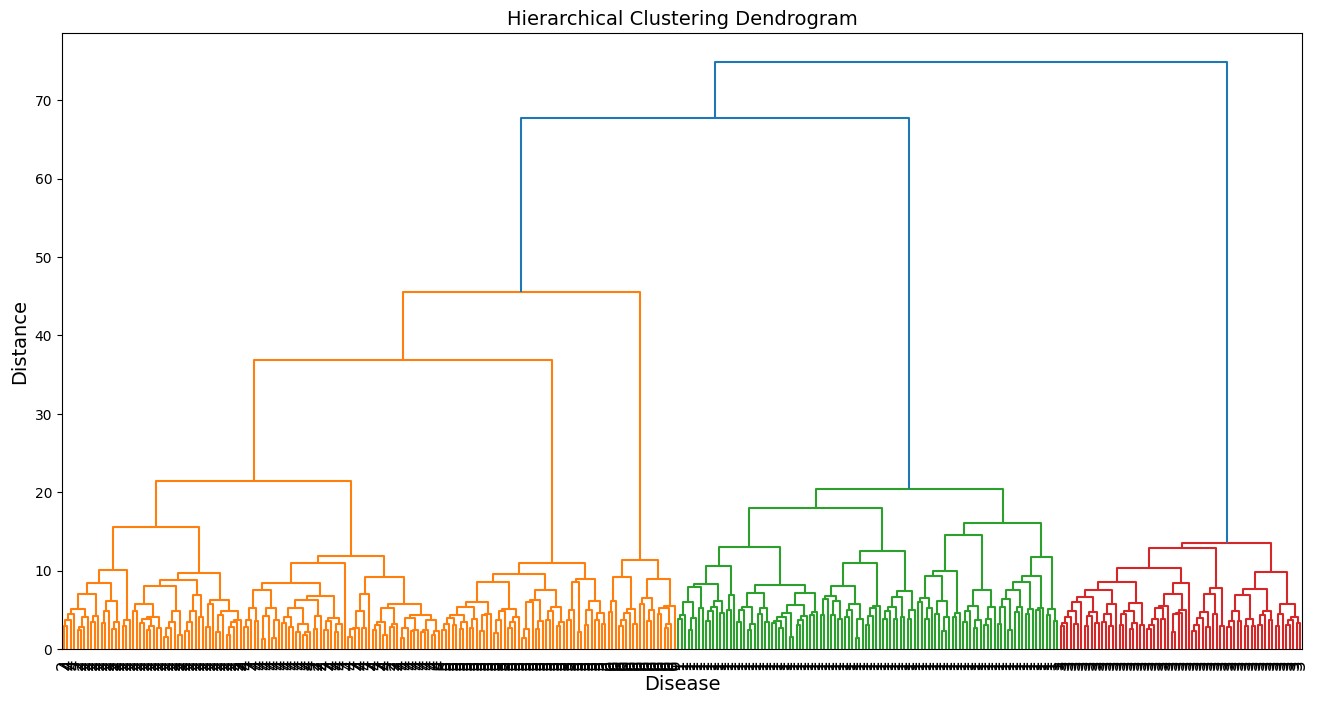

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
scaler = StandardScaler() #  Scaling ensures every feature contributes equally to the distance calculation.
scaled_features = scaler.fit_transform(df_derm)
linked = linkage(scaled_features, method = 'ward')

plt.figure(figsize = (16, 8))
dendrogram (linked,
           labels = df_derm['Disease'].values,
           orientation = 'top',
           distance_sort = 'descending',
           show_leaf_counts = True,
           leaf_font_size = 12)

plt.title('Hierarchical Clustering Dendrogram', fontsize = 14)
plt.xlabel('Disease', fontsize = 14)
plt.ylabel('Distance', fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

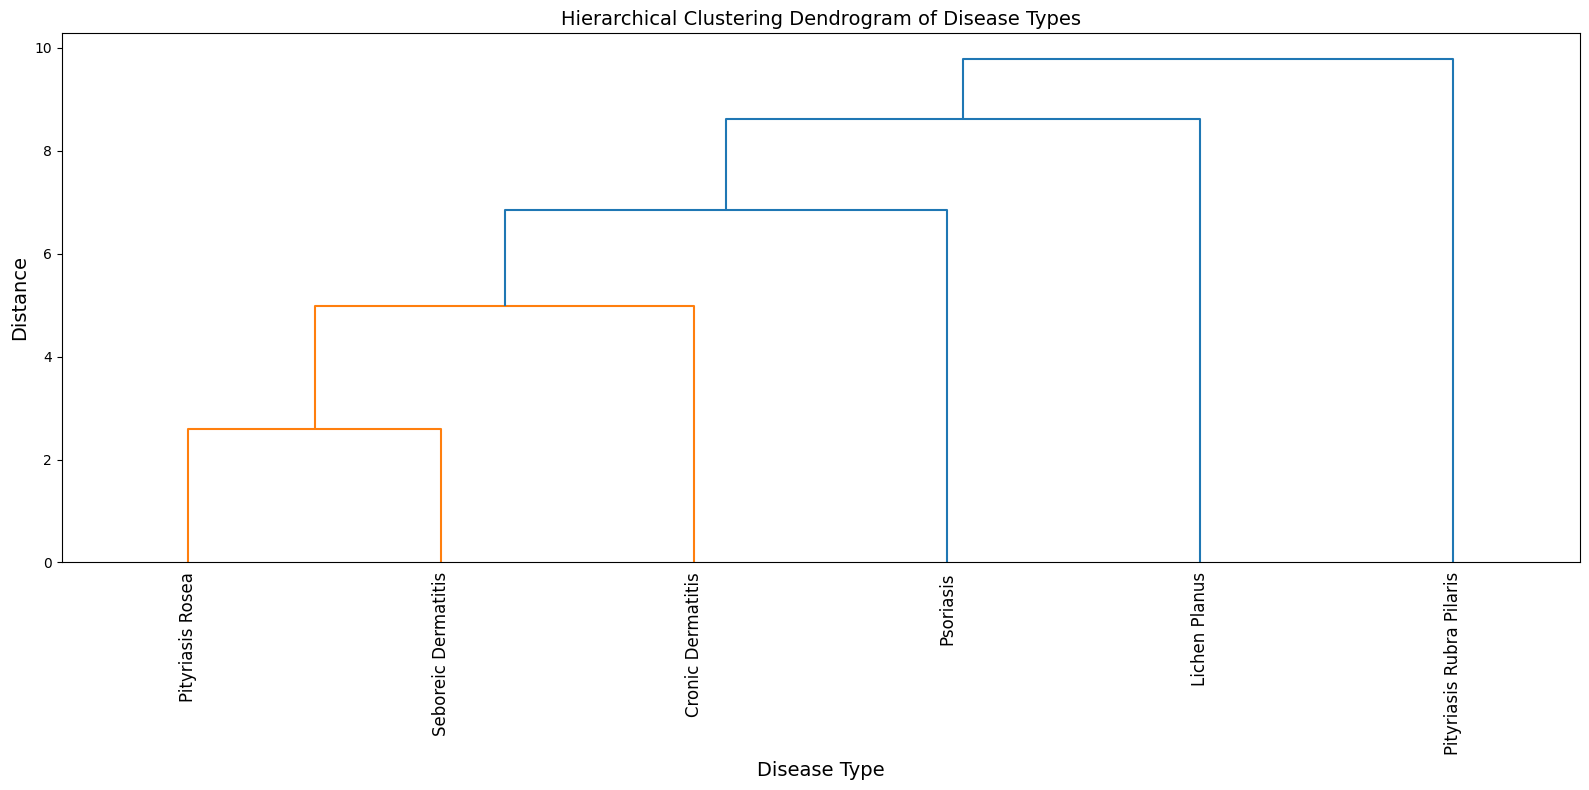

In [27]:
# Separate features (X) and target (y)
X = df_derm[features_all]
y = df_derm['Disease'] # Assuming 'Disease' is the column name for the target

combined_data = pd.concat([X, y], axis=1).dropna()
X_cleaned = combined_data[features_all] # Use the cleaned features
y_cleaned = combined_data['Disease'] # Use the cleaned target

# --- Scale the features ---
# Scaling ensures every feature contributes equally to the distance calculation.
scaler = StandardScaler()
scaled_features_cleaned = scaler.fit_transform(X_cleaned)

# Convert scaled features back to a DataFrame to easily group by disease
scaled_df_cleaned = pd.DataFrame(scaled_features_cleaned, columns=features_all, index=X_cleaned.index)
scaled_df_cleaned['Disease'] = y_cleaned # Add the cleaned disease labels back

# --- Calculate Mean Features for Each Disease Type ---
# Group the scaled data by the disease type and calculate the mean of features for each group
disease_centroids_scaled = scaled_df_cleaned.groupby('Disease')[features_all].mean()

# --- Perform Hierarchical Clustering on Disease Centroids ---
# Use the scaled centroids of each disease type as the data for linkage
linked = linkage(disease_centroids_scaled, method='ward') 

# --- Plot the Dendrogram ---
plt.figure(figsize=(16, 8))
dendrogram(linked,
           labels=disease_names,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False, # Set to False as we are clustering diseases, not instances
           leaf_font_size=12)

plt.title('Hierarchical Clustering Dendrogram of Disease Types', fontsize=14)
plt.xlabel('Disease Type', fontsize=14) # Label the x-axis as Disease Type
plt.ylabel('Distance', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [19]:
# Try different linkage methods
print(f"{cluster_type} Clustering different Linkage Methods")

# Perform hierarchical clustering
for linkage_method in ['ward', 'complete', 'average', 'single']:
    # Perform Agglomerative Clustering
    ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    y_ac = ac.fit_predict(X_scaled)
    # Calculate silhouette score
    a_silhouette = float(silhouette_score(X_scaled, y_ac))
    print(f"Silhouette Score for Agglomerative Clustering: {a_silhouette} with {linkage_method=}")
    step_name = f'{step}-link-{linkage_method}'

Agglomerative Clustering different Linkage Methods
Silhouette Score for Agglomerative Clustering: 0.27900239331783594 with linkage_method='ward'
Silhouette Score for Agglomerative Clustering: 0.2451424098202917 with linkage_method='complete'
Silhouette Score for Agglomerative Clustering: 0.29183604076568087 with linkage_method='average'
Silhouette Score for Agglomerative Clustering: 0.2506672486121512 with linkage_method='single'


Elbow Method: Calculate inertia for different numbers of clusters for KMeans Clustering


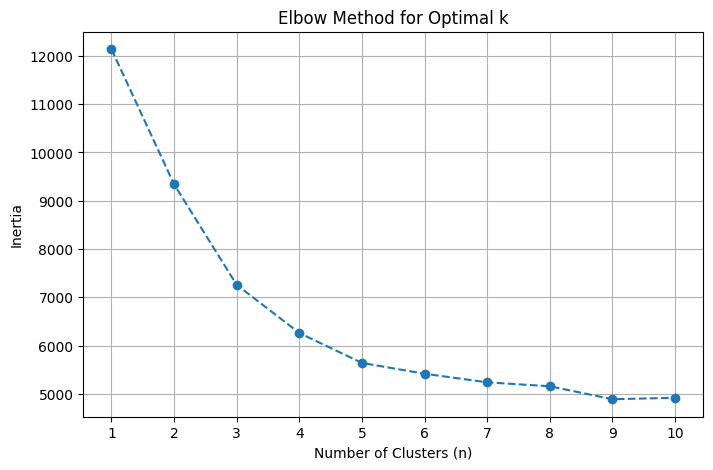

In [20]:
# Use KMeans/Divisive Clustering to find the best features
# Use the elbow method to find a good n_clusters
cluster_type = 'KMeans'
print(f"Elbow Method: Calculate inertia for different numbers of clusters for {cluster_type} Clustering")
n_cluster_values = range(1, 11)
inertias = []
for n in n_cluster_values:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_scaled)
    inertia = kmeans.inertia_
    inertias.append(inertia)
        
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(n_cluster_values, inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (n)')
plt.ylabel('Inertia')
plt.xticks(n_cluster_values)
plt.grid()
plt.show()

In [30]:
print(f"KMeans Clustering to predict Disease")
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
y_means = kmeans.fit_predict(X_scaled)
inertia = float(kmeans.inertia_)
print(f"Inertia (SSE) for KMeans: {inertia}")
silhouette_score_value = silhouette_score(X_scaled, y_means)
print(f"Silhouette Score for KMeans: {silhouette_score_value}")

KMeans Clustering to predict Disease
Inertia (SSE) for KMeans: 7257.8770657967925
Silhouette Score for KMeans: 0.279408496502229


Will use Number of Clusters = 3 as identified above in Elbow method.

<b>Question:</b> Finally, use two different clustering algorithms and see how well these attributes can determine the disease type.<p>

<b>Answer:</b>

## Problem 1.5 Analysis
<b>Question:</b> Now, compare and contrast the five models you built. Having done both classification and clustering on the same dataset, what can you say about this data and/or the techniques you used? Write your thoughts in 2-3 paragraphs.<p>

<b>Answer:</b>
Having built and evaluated five different models on the dermatology dataset, a clear picture emerges regarding the data's structure and the suitability of various machine learning techniques for determining disease type. <p>
<b>Model 1,</b> a Simple Linear Regression predicting disease type based solely on Age using Gradient Descent, demonstrated very poor performance with a high RMSE of approximately 1.5. This outcome was expected, as regression is fundamentally ill-suited for predicting discrete, categorical outcomes like disease types, and Age alone appears to have limited linear correlation with the specific disease categories.<p>
This contrasts sharply with the classification models (<b>Model 2 and Model 3</b>), which are designed for this type of problem. Comparing the classification models, the Random Forest classifier (<b>Model 2</b>), trained on all clinical and histopathological attributes, achieved remarkably high accuracy (98%). Its confusion matrix revealed near-perfect classification for several disease types (Psoriasis, Lichen Planus, Cronic Dermatitis, Pityriasis Rubra Pilaris), with only minor confusion primarily between Seboreic Dermatitis and Pityriasis Rosea. The K-Nearest Neighbors classifier (<b>Model 3</b>), also using all attributes (scaled), achieved a lower accuracy (71% with k=2). Its confusion matrix showed more significant misclassifications and confusion across multiple classes, indicating that while the features contain predictive information, KNN's simple distance-based approach is less effective than Random Forest's ensemble of decision trees at capturing the potentially complex, non-linear boundaries between these disease types in the feature space.<p>
The clustering models (<b>Model 4: Agglomerative, Model 5: K-Means</b>), both applied to the scaled features, explored the inherent grouping within the data in an unsupervised manner. The Elbow method on inertia suggested around 3 clusters for both algorithms. While Agglomerative Clustering with the 'complete' linkage achieved the highest Silhouette Score among tested linkages (~0.405), this score suggests only a weak clustering structure with some overlap between groups. The dendrogram of disease centroids provided a visual hierarchy of disease similarity based on average feature profiles, but the clustering did not perfectly align with the 6 known disease types. This indicates that while the attributes contain structure that allows for some grouping, the boundaries between the known disease categories might not be clearly defined or separated in the feature space from an unsupervised perspective, or that the optimal number of clusters for the data's inherent structure is 5 rather than 6.<p>
The high performance of the supervised <b>Random Forest Model2</b>, however, demonstrates that these features do contain sufficient information to accurately distinguish the known disease types when guided by the actual labels during training.